In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep = '\t')

In [9]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [3]:
chipo.info()
print(chipo.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
           order_id     quantity     item_name choice_description item_price
count   4622.000000  4622.000000          4622               3376       4622
unique          NaN          NaN            50               1043         78
top             NaN          NaN  Chicken Bowl        [Diet Coke]     $8.75 
freq            NaN          NaN           726                134        730
mean     927.254868     1.075725           NaN                NaN        NaN
std      528.890796     0.410186           N

In [10]:
print(chipo.isnull().sum())

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


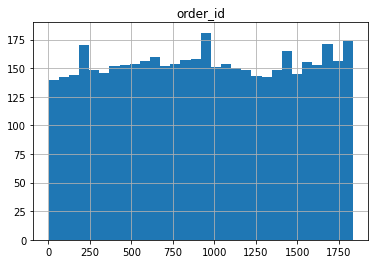

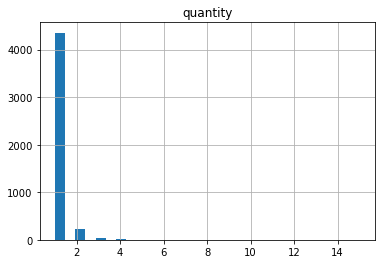

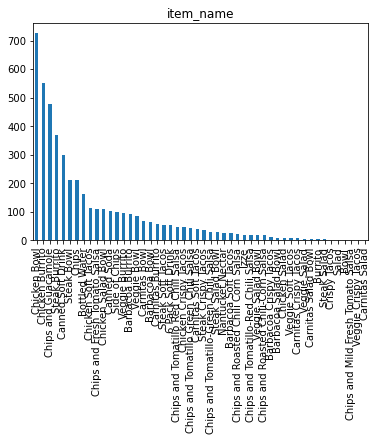

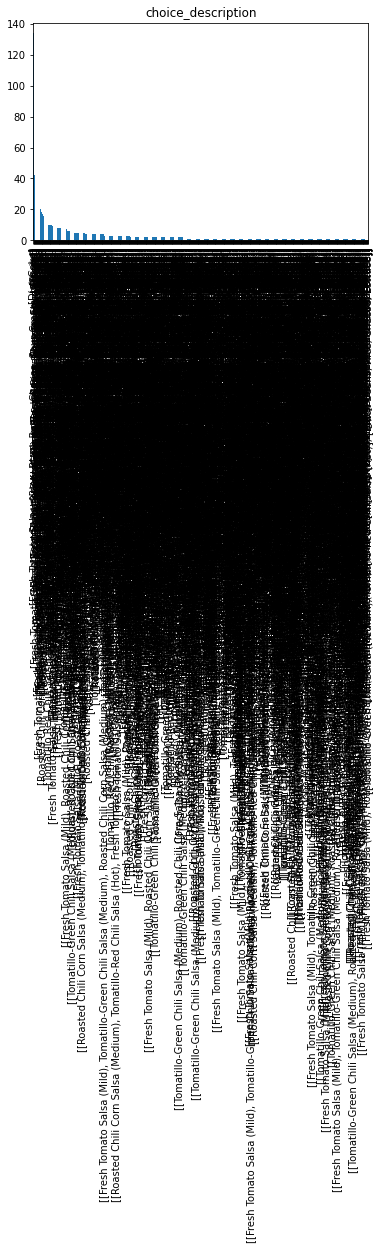

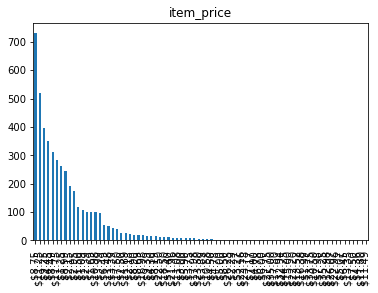

In [12]:
import matplotlib.pyplot as plt
for col in chipo.columns:
    plt.figure()
    if chipo[col].dtype in ['int64', 'float64']:
        chipo[col].hist(bins=30)
    else:
        chipo[col].value_counts().plot(kind='bar')
    plt.title(col)

array([[<AxesSubplot:title={'center':'order_id'}>,
        <AxesSubplot:title={'center':'quantity'}>]], dtype=object)

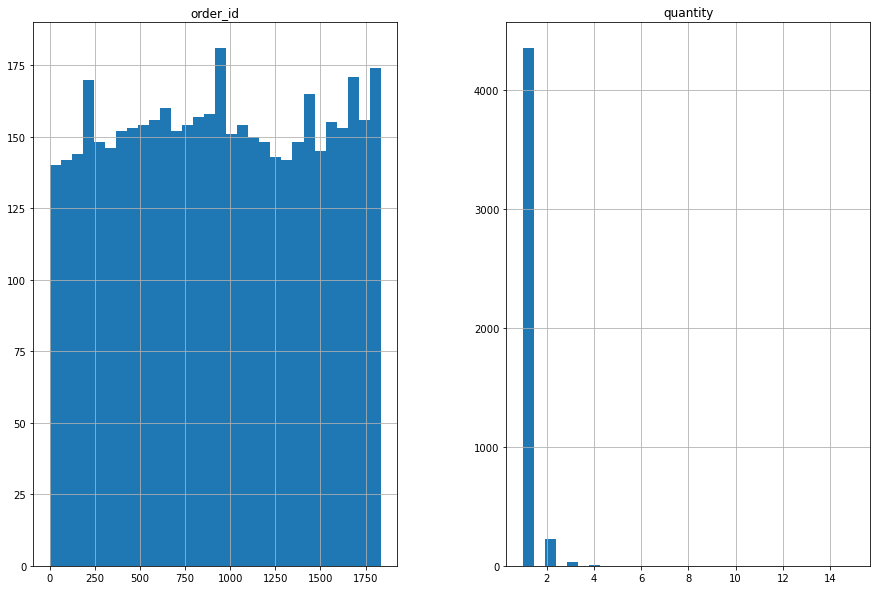

In [6]:
import matplotlib.pyplot as plt
chipo.hist(bins=30, figsize=(15, 10))
# plt.show()

In [8]:
print("Correlations:")
print(chipo.corr())

Correlations:
          order_id  quantity
order_id  1.000000  0.032397
quantity  0.032397  1.000000


In [3]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
#Step 5. What is the number of observations in the dataset?
chipo.shape

# Solution 2
chipo.info() # entries <= 4622 observations


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [5]:
#Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [6]:
#Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [20]:
#Step 9. Which was the most-ordered item?
k = chipo.groupby('item_name')['quantity'].agg(sum).sort_values(ascending= False)
k = pd.DataFrame(k)
k.iloc[0,:]

quantity    761
Name: Chicken Bowl, dtype: int64

In [21]:
#Step 12. How many different item_name are in this dataset?
chipo['item_name'].nunique()

50

In [23]:
#most frequent item_name
chipo['item_name'].value_counts().head()

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

In [36]:
#Step 17. What is the mean of price?
chipo['item_price'].apply(lambda x: float(x.replace('$',''))).mean()

7.464335785374297

In [37]:
#Step 13.a. Check the item price type
type(chipo['item_price'][0])

str

In [ ]:
#Step 13.b. Create a lambda function and change the type of item price
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [41]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [42]:
#Step 14. How much was the revenue for the period in the dataset?
dd = chipo['item_price'] * chipo['quantity']
dd.sum()

39237.02

In [43]:
#Step 15. How many orders were made in the period?
chipo['order_id'].count()

4622

In [46]:
#Step 16. What is the average revenue amount per order?
# Solution 1

chipo['revenue'] = chipo['item_price'] * chipo['quantity']

chipo.groupby('order_id')['revenue'].sum().mean()

21.39423118865867

In [ ]:
#Step 8. What is the name of 5th column?


'item_price'

In [49]:
#Step 4. How many products cost more than $10.00?
# clean the item_price column and transform it in a float


# chipo_filtered
dd = chipo[['item_price','item_name']].drop_duplicates()
dd = dd[dd['item_price']>10]
dd.shape[0]

97

In [ ]:

# select only the products with quantity equals to 1


In [ ]:
# Step 5. What is the price of each item?
# print a data frame with only two columns item_name and item_price
# delete the duplicates in item_name and quantity
# chipo_filtered = chipo.drop_duplicates(['item_name','quantity'])


# select only the products with quantity equals to 1


# select only the item_name and item_price columns


# sort the values from the most to less expensive


In [57]:
# Step 7. What was the quantity of the most expensive item ordered?
chipo2 = chipo.sort_values('item_price', ascending = False)
bestseller = chipo2.iloc[0]['item_name']

dd = chipo[chipo['item_name']==bestseller]
dd['quantity'].sum()

130

In [59]:
# Step 8. How many times was a Veggie Salad Bowl ordered?
dd = chipo[chipo['item_name']== 'Veggie Salad Bowl']
dd['order_id'].count()

18

In [62]:
# Step 9. How many times did someone order more than one Canned Soda?
dd = chipo[(chipo['item_name']== 'Canned Soda') & (chipo['quantity']>1)]
dd.shape

(20, 6)